# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# 1. Подготовка данных

In [2]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import collections
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

### 1.1 Проверка значений эффективности обогащения

In [3]:
# читаем данные из файлов
df_train = pd.read_csv('/datasets/gold_recovery_train.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [4]:
df_corr = df_test.corr()
corr_dict = collections.defaultdict(list)

for i in df_corr:
    max_cor = 0
    param_cor = 0
    for j in df_corr.columns:
        if abs(df_corr.loc[i,j])>abs(max_cor) and df_corr.loc[i,j]!=1:
            max_cor = df_corr.loc[i,j]
            param_cor = j
    corr_dict[i] = [param_cor,max_cor]
df_max_cor = pd.DataFrame(corr_dict).T

In [5]:
dfg = pd.DataFrame(corr_dict).T
dfg

,0,1
primary_cleaner.input.sulfate,rougher.input.floatbank10_sulfate,0.670352
primary_cleaner.input.depressant,rougher.input.feed_ag,0.547463
primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,-0.258358
primary_cleaner.input.xanthate,rougher.input.floatbank11_sulfate,0.656449
primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_b_air,0.99509
primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_c_level,0.966512
primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_d_air,0.995137
primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_a_level,0.868148
primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_b_air,0.977344
primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_a_level,0.966512


In [9]:
df_train[df_train.notnull().all(1)]

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
16856,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
16857,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
16858,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [10]:
# информация о данных
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [11]:
# информация о данных
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

In [12]:
# скопируем df_train для дальнейшей работы
df_train_2 = df_train.copy()
df_train_3 = df_train.copy()

In [13]:
# функция для определения эффективность обогащения руды после флотации
def recovery(df):
    try:
        return 100*df['rougher.output.concentrate_au']*(df['rougher.input.feed_au'] - df['rougher.output.tail_au'])/(df['rougher.input.feed_au']*(df['rougher.output.concentrate_au'] - df['rougher.output.tail_au']))
    except:
        pass

In [14]:
# посмотрим пределы значений rougher.output.recovery
df_train_3['rougher.output.recovery'].max(), df_train_3['rougher.output.recovery'].min()

(100.0, 0.0)

In [15]:
# применим функцию к df_train
df_train_2['my_recovery'] = df_train_2.apply(recovery, axis=1)
df_train_3['my_recovery'] = df_train_3.apply(recovery, axis=1)

In [16]:
# проверим сколько значений в столбце 'rougher.output.recovery' пропущено, при условии, данные для расчета присутствуют
df_train_3.loc[df_train_3['rougher.output.recovery'].isna() & df_train_3['my_recovery'].notna(), ['rougher.output.concentrate_au','rougher.input.feed_au','rougher.output.tail_au','rougher.output.recovery', 'my_recovery']]

,rougher.output.concentrate_au,rougher.input.feed_au,rougher.output.tail_au,rougher.output.recovery,my_recovery
53,3.507147,7.548341,2.187465,NaN,188.742102
372,4.642559,0.139652,2.574309,NaN,-3913.312866
377,15.084039,3.501578,5.964024,NaN,-116.312118
560,19.619751,1.921101,1.939904,NaN,-1.086185
700,1.483835,0.253075,1.477470,NaN,-112789.873301
...,...,...,...,...,...
16697,6.038533,11.035269,1.343570,NaN,112.957805
16698,10.712677,10.943209,1.858404,NaN,100.442153
16699,0.010000,10.149224,1.729189,NaN,-0.482567
16700,0.010000,10.591710,1.481931,NaN,-0.584325


In [17]:
# заполним пропуски в столбцах 'rougher.output.recovery', 'my_recovery' нулями для расчета mean_absolute_error
df_train_3['rougher.output.recovery'] = df_train_3['rougher.output.recovery'].fillna(0)
df_train_3['my_recovery'] = df_train_3['my_recovery'].fillna(0)

In [18]:
#считаем расчета mean_absolute_error
mae = mean_absolute_error(df_train_3['rougher.output.recovery'],df_train_3['my_recovery'])
mae

48.735241343008205

In [19]:
# посмотрим сколько строк имеют разницу между rougher.output.recovery и my_recovery
df_train_3.loc[abs(df_train_3['rougher.output.recovery'] - df_train_3['my_recovery'])>0.1, ['rougher.output.concentrate_au','rougher.input.feed_au','rougher.output.tail_au','rougher.output.recovery', 'my_recovery']]

,rougher.output.concentrate_au,rougher.input.feed_au,rougher.output.tail_au,rougher.output.recovery,my_recovery
53,3.507147,7.548341,2.187465,0.0,188.742102
372,4.642559,0.139652,2.574309,0.0,-3913.312866
377,15.084039,3.501578,5.964024,0.0,-116.312118
560,19.619751,1.921101,1.939904,0.0,-1.086185
700,1.483835,0.253075,1.477470,0.0,-112789.873301
...,...,...,...,...,...
16697,6.038533,11.035269,1.343570,0.0,112.957805
16698,10.712677,10.943209,1.858404,0.0,100.442153
16699,0.010000,10.149224,1.729189,0.0,-0.482567
16700,0.010000,10.591710,1.481931,0.0,-0.584325


In [20]:
#считаем  mean_absolute_error для датафрейма откуда исключили Nan-значения в столбце 'rougher.output.recovery'(и примерно 15%)

df_train_2.dropna(subset=['rougher.output.recovery'], inplace=True)

mae = mean_absolute_error(df_train_2['rougher.output.recovery'],df_train_2['my_recovery'])
mae

1.1290254018238898e-14

### Вывод
Проанализировав данные, можно сделать вывод, что параметр 'rougher.output.recovery' может принимать значения от 0 до 100. Все значения выходящие за границы этих значений заменены на NaN. При удалении строк с пропусками в столбце 'rougher.output.recovery' среднее абсолютное отклонение между рассчитанной эффективностью обогащения и значениями в столбце 'rougher.output.recovery' стремится к 0.

### 1.2 Анализ признаков, отсутствующих в тестовой выборке

In [21]:
# выедем название столбцов, которые отстутствуют в тестовой выборке
cols=[]
for col in df_full.columns:
    if col not in df_test.columns:
        cols.append(col)
cols

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

### Вывод
Судя по названиям, данные относятся к типу параметра "параметры продукта", то есть эти параметры описывают выходные данные.

### 1.3 Предобработка данных
Так как данные распределены по времени, пропуски заполним предыдущими значениями

In [22]:
# кол-во пропусков в обучающей выборке
na_dict_train = df_train.isna().sum().to_dict()
na_dict_train

{'date': 0,
 'final.output.concentrate_ag': 72,
 'final.output.concentrate_pb': 72,
 'final.output.concentrate_sol': 370,
 'final.output.concentrate_au': 71,
 'final.output.recovery': 1521,
 'final.output.tail_ag': 66,
 'final.output.tail_pb': 183,
 'final.output.tail_sol': 145,
 'final.output.tail_au': 66,
 'primary_cleaner.input.sulfate': 1307,
 'primary_cleaner.input.depressant': 1262,
 'primary_cleaner.input.feed_size': 0,
 'primary_cleaner.input.xanthate': 985,
 'primary_cleaner.output.concentrate_ag': 82,
 'primary_cleaner.output.concentrate_pb': 358,
 'primary_cleaner.output.concentrate_sol': 636,
 'primary_cleaner.output.concentrate_au': 82,
 'primary_cleaner.output.tail_ag': 83,
 'primary_cleaner.output.tail_pb': 99,
 'primary_cleaner.output.tail_sol': 281,
 'primary_cleaner.output.tail_au': 83,
 'primary_cleaner.state.floatbank8_a_air': 40,
 'primary_cleaner.state.floatbank8_a_level': 33,
 'primary_cleaner.state.floatbank8_b_air': 40,
 'primary_cleaner.state.floatbank8_b_leve

In [23]:
# кол-во пропусков в обучающей выборке
na_dict_test = df_test.isna().sum().to_dict()
na_dict_test

{'date': 0,
 'primary_cleaner.input.sulfate': 302,
 'primary_cleaner.input.depressant': 284,
 'primary_cleaner.input.feed_size': 0,
 'primary_cleaner.input.xanthate': 166,
 'primary_cleaner.state.floatbank8_a_air': 16,
 'primary_cleaner.state.floatbank8_a_level': 16,
 'primary_cleaner.state.floatbank8_b_air': 16,
 'primary_cleaner.state.floatbank8_b_level': 16,
 'primary_cleaner.state.floatbank8_c_air': 16,
 'primary_cleaner.state.floatbank8_c_level': 16,
 'primary_cleaner.state.floatbank8_d_air': 16,
 'primary_cleaner.state.floatbank8_d_level': 16,
 'rougher.input.feed_ag': 16,
 'rougher.input.feed_pb': 16,
 'rougher.input.feed_rate': 40,
 'rougher.input.feed_size': 22,
 'rougher.input.feed_sol': 67,
 'rougher.input.feed_au': 16,
 'rougher.input.floatbank10_sulfate': 257,
 'rougher.input.floatbank10_xanthate': 123,
 'rougher.input.floatbank11_sulfate': 55,
 'rougher.input.floatbank11_xanthate': 353,
 'rougher.state.floatbank10_a_air': 17,
 'rougher.state.floatbank10_a_level': 16,
 'ro

In [24]:
# заполним пропуски
df_train.fillna(method='ffill', inplace=True)
df_test.fillna(method='ffill', inplace=True)

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16860 non-null float64
final.output.concentrate_pb                           16860 non-null float64
final.output.concentrate_sol                          16860 non-null float64
final.output.concentrate_au                           16860 non-null float64
final.output.recovery                                 16860 non-null float64
final.output.tail_ag                                  16860 non-null float64
final.output.tail_pb                                  16860 non-null float64
final.output.tail_sol                                 16860 non-null float64
final.output.tail_au                                  16860 non-null float64
primary_cleaner.input.sulfate                         16860 non-null float64
primary_cleaner.input.depressant             

# 2. Анализ данных

### 2.1 Изменение концентрации металлов (Au, Ag, Pb)

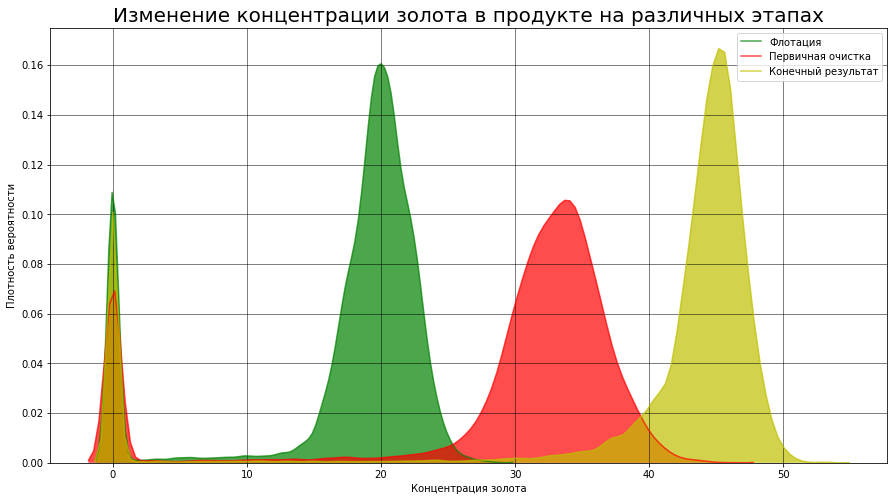

In [26]:
fig = plt.figure(figsize=(15,8))
plt.grid(color='black', linewidth=0.5)
ax=sns.kdeplot(df_train['rougher.output.concentrate_au'], shade=True, color="g", alpha=.7, label = 'Флотация')
sns.kdeplot(df_train['primary_cleaner.output.concentrate_au'], shade=True, color="r", alpha=.7,ax=ax, label = 'Первичная очистка')
sns.kdeplot(df_train['final.output.concentrate_au'], shade=True, color="y", alpha=.7,ax=ax, label = 'Конечный результат')
plt.xlabel('Концентрация золота')
plt.ylabel('Плотность вероятности')
plt.title('Изменение концентрации золота в продукте на различных этапах',fontsize=20)
plt.show()

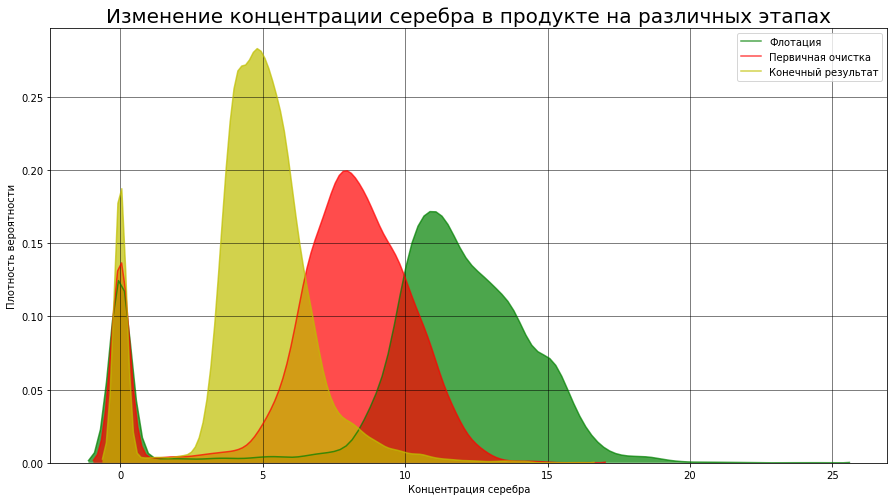

In [27]:
fig = plt.figure(figsize=(15,8))
plt.grid(color='black', linewidth=0.5)
ax = sns.kdeplot(df_train['rougher.output.concentrate_ag'], shade=True, color="g", alpha=.7, label = 'Флотация')
sns.kdeplot(df_train['primary_cleaner.output.concentrate_ag'], shade=True, color="r", alpha=.7,ax=ax, label = 'Первичная очистка')
sns.kdeplot(df_train['final.output.concentrate_ag'], shade=True, color="y", alpha=.7,ax=ax, label = 'Конечный результат')
plt.xlabel('Концентрация серебра')
plt.ylabel('Плотность вероятности')
plt.title('Изменение концентрации серебра в продукте на различных этапах',fontsize=20)
plt.show()

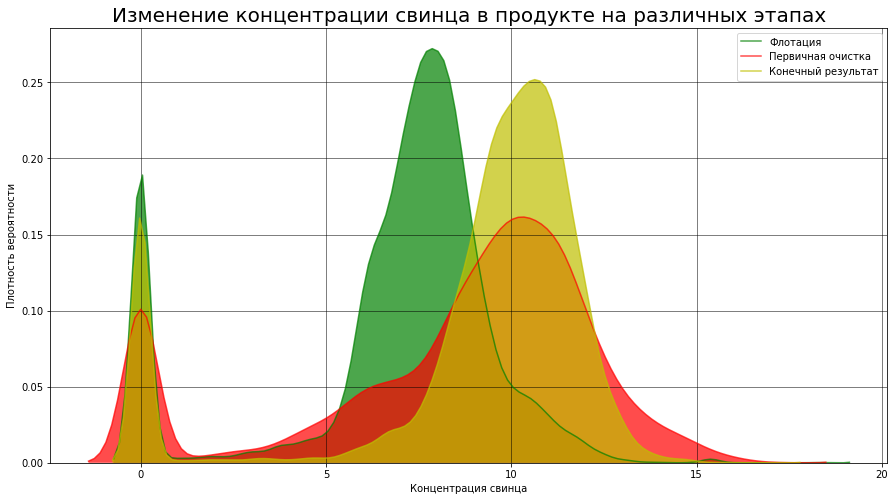

In [28]:
fig = plt.figure(figsize=(15,8))
plt.grid(color='black', linewidth=0.5)
ax = sns.kdeplot(df_train['rougher.output.concentrate_pb'], shade=True, color="g", alpha=.7, label = 'Флотация')
sns.kdeplot(df_train['primary_cleaner.output.concentrate_pb'], shade=True, color="r", alpha=.7,ax=ax, label = 'Первичная очистка')
sns.kdeplot(df_train['final.output.concentrate_pb'],shade=True, color="y", alpha=.7,ax=ax, label = 'Конечный результат')
plt.xlabel('Концентрация свинца')
plt.ylabel('Плотность вероятности')
plt.title('Изменение концентрации свинца в продукте на различных этапах',fontsize=20)
plt.show()

### Вывод
По мере очистки сырья концентрация золота и свинца растет, концентрация серебра падает. 

### 2.2 Распределения размеров гранул сырья

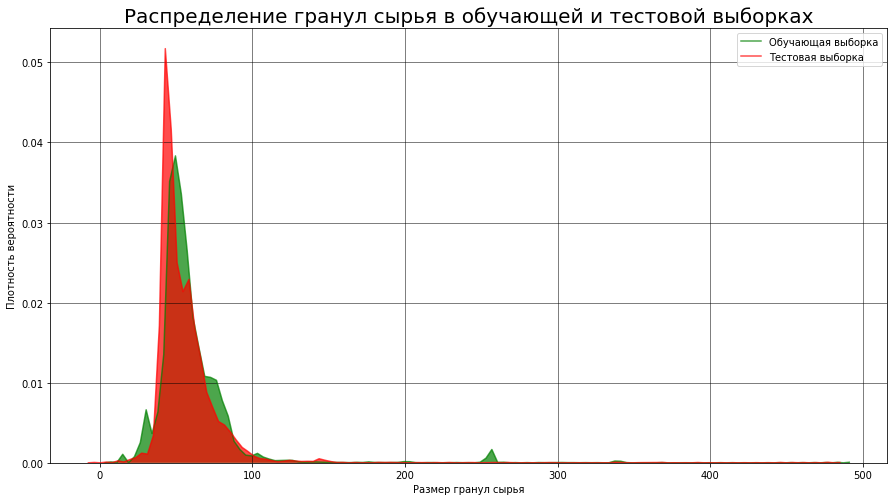

In [29]:
fig = plt.figure(figsize=(15,8))
plt.grid(color='black', linewidth=0.5)
ax = sns.kdeplot(df_train['rougher.input.feed_size'], shade=True, color="g", alpha=.7, label = 'Обучающая выборка')
sns.kdeplot(df_test['rougher.input.feed_size'], shade=True, color="r", alpha=.7,ax=ax, label = 'Тестовая выборка')
plt.xlabel('Размер гранул сырья')
plt.ylabel('Плотность вероятности')
plt.title('Распределение гранул сырья в обучающей и тестовой выборках',fontsize=20)
plt.show()

### Вывод
Распределение гранул сырья в обучающей и тестовой выборках имеют похожий характер.

### 2.3 Суммарная концентрация всех веществ на разных стадиях

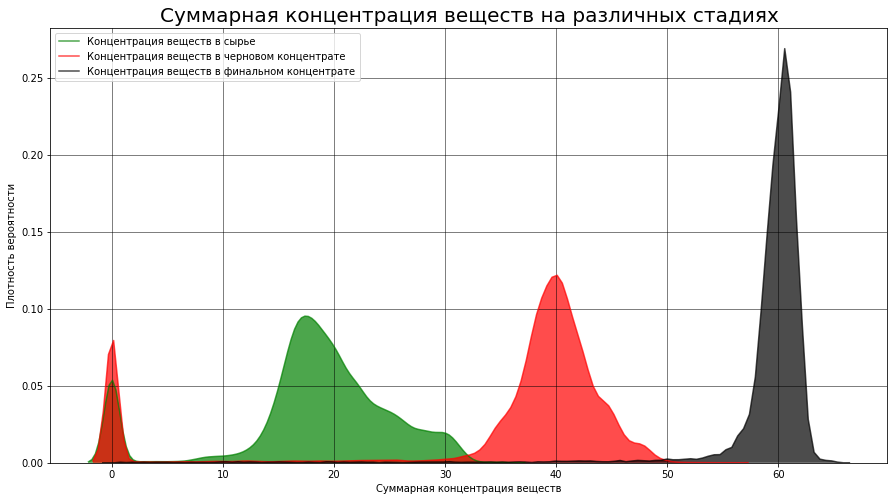

In [30]:
fig = plt.figure(figsize=(15,8))
plt.grid(color='black', linewidth=0.5)


sum_in = df_train['rougher.input.feed_ag'] + df_train['rougher.input.feed_au'] + df_train['rougher.input.feed_pb']
sum_rougher = df_train['rougher.output.concentrate_ag'] + df_train['rougher.output.concentrate_au'] + df_train['rougher.output.concentrate_pb']
sum_final = df_train['final.output.concentrate_ag'] + df_train['final.output.concentrate_au'] + df_train['final.output.concentrate_pb']

ax = sns.kdeplot(sum_in, shade=True, color="g", alpha=.7, label = 'Концентрация веществ в сырье')
sns.kdeplot(sum_rougher, shade=True, color="r", alpha=.7,ax=ax, label = 'Концентрация веществ в черновом концентрате')
sns.kdeplot(sum_final, shade=True, color="black", alpha=.7,ax=ax, label = 'Концентрация веществ в финальном концентрате')

plt.xlabel('Суммарная концентрация веществ')
plt.ylabel('Плотность вероятности')
plt.title('Суммарная концентрация веществ на различных стадиях',fontsize=20)
plt.show()

In [31]:
# проверим наличие целевых признаков при нулевых значениях концентрации
list_substance = ['rougher.input.feed_ag','rougher.input.feed_au','rougher.input.feed_pb','rougher.output.concentrate_ag','rougher.output.concentrate_au','rougher.output.concentrate_pb','final.output.concentrate_ag','final.output.concentrate_au','final.output.concentrate_pb']

for i in list_substance:
    print(i)
    print(len(df_full[df_full[i]==0])/df_full[df_full[i]==0][['rougher.output.recovery','final.output.recovery']].isna().sum())

rougher.input.feed_ag
rougher.output.recovery    1.0
final.output.recovery      1.0
dtype: float64
rougher.input.feed_au
rougher.output.recovery    1.0
final.output.recovery      1.0
dtype: float64
rougher.input.feed_pb
rougher.output.recovery    1.0
final.output.recovery      1.0
dtype: float64
rougher.output.concentrate_ag
rougher.output.recovery    1.273142
final.output.recovery      1.278141
dtype: float64
rougher.output.concentrate_au
rougher.output.recovery    1.273142
final.output.recovery      1.278141
dtype: float64
rougher.output.concentrate_pb
rougher.output.recovery    1.273142
final.output.recovery      1.278141
dtype: float64
final.output.concentrate_ag
rougher.output.recovery    1.097279
final.output.recovery      1.103283
dtype: float64
final.output.concentrate_au
rougher.output.recovery    1.097279
final.output.recovery      1.103283
dtype: float64
final.output.concentrate_pb
rougher.output.recovery    1.097279
final.output.recovery      1.103283
dtype: float64


In [32]:
#удалим строки с нулевым значением в столбцах 'rougher.input.feed_ag','rougher.input.feed_au','rougher.input.feed_pb'
list_col = ['rougher.input.feed_ag','rougher.input.feed_au','rougher.input.feed_pb']
for i in list_col:
    df_train = df_train[df_train[i]!=0]
    try:
        df_test = df_test[df_test[i]!=0]
    except:
        pass

### Вывод
Суммарная концентрация вещест по мере очистки растет, по всей видимости за счет уменьшения количества примесей в продукте.
Также видим, что часто встречаются нулевые значения суммарной концентрации веществ. Проверив наличие целевых признаков при нулевых значениях суммарной концентрации, мы выяснили, что целевые признаки отсутствуют при нулевых значениях суммарной концентрации веществ на начальном этапе очистки (до флотации). Поэтому удалим соответствующие строки.

# 3. Модель

### 3.1 Функция для вычисления итоговой sMAPE

In [33]:
def total_smape(t,p):
    rougher = (1/len(t['rougher.output.recovery']))*np.sum(100*np.abs(t['rougher.output.recovery']-p[:,0])/((np.abs(t['rougher.output.recovery'])+np.abs(p[:,0]))/2))
    final = (1/len(t['final.output.recovery']))*np.sum(100*np.abs(t['final.output.recovery']-p[:,1])/((np.abs(t['final.output.recovery'])+np.abs(p[:,1]))/2))
    return 0.25*rougher + 0.75*final

def tot(t,p):
    rougher = 100*(abs(t['rougher.output.recovery']-p[:,0])/((abs(t['rougher.output.recovery'])+abs(p[:,0]))/2)).sum()/(len(t['rougher.output.recovery']))
    final = 100*(abs(t['final.output.recovery']-p[:,1])/((abs(t['final.output.recovery'])+abs(p[:,1]))/2)).sum()/(len(t['final.output.recovery']))
    print(rougher, final)
    return 0.25*rougher + 0.75*final

### 3.2 Подготовка данных для обучения моделей
Обучающую выборку разделим на обучающие и целевые признаки. В обучающие признаки включим все признаки, имеющиеся тестовой выборке кроме даты.

In [34]:
# разделим обучающую выборку на features, target
df_train_features = df_train.drop(cols + ['date','rougher.output.recovery','final.output.recovery'], axis=1)
df_train_target = df_train[['rougher.output.recovery','final.output.recovery']]

In [35]:
df_train_features.shape
df_train_target

,rougher.output.recovery,final.output.recovery
0,87.107763,70.541216
1,86.843261,69.266198
2,86.842308,68.116445
3,87.226430,68.347543
4,86.688794,66.927016
...,...,...
16855,89.574376,73.755150
16856,87.724007,69.049291
16857,88.890579,67.002189
16858,89.858126,65.523246


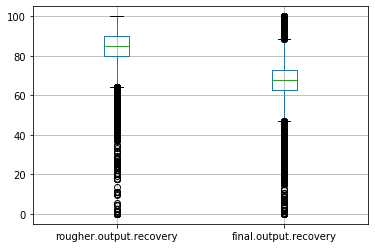

In [36]:
df_train_target.boxplot()

In [37]:
# 'rougher.output.recovery','final.output.recovery'

In [38]:
a=df_train_target['rougher.output.recovery'].quantile(q=0.25)
b=df_train_target['rougher.output.recovery'].quantile(q=0.75)
c=df_train_target['final.output.recovery'].quantile(q=0.25)
d=df_train_target['final.output.recovery'].quantile(q=0.75)
a,b,c,d

(79.77548002174524, 90.03734414057992, 62.45440320204274, 72.8474739896865)

In [39]:
d+3*(d-c)

104.0266863526178

In [ ]:
d+3*(d-c)

In [137]:
#масштабируем признаки для линейной регрессии, для решающего дерева и случайного леса такой необходимости нет
list_col = df_train_features.columns.to_list()
scaler = StandardScaler()
scaler.fit(df_train_features[list_col])

df_train_features_LR = df_train_features.copy()
df_train_features_LR[list_col] = scaler.transform(df_train_features[list_col])
df_train_features_LR.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,-0.042058,0.413750,-0.085869,0.332822,-0.130793,-0.113438,-0.127751,-0.426739,-0.129618,-0.095903,...,-0.948573,-0.292766,-0.585323,-0.580518,-1.046248,-0.184191,-0.802329,-0.191590,-0.811169,-1.826459
1,-0.074273,0.458813,-0.085869,0.367227,-0.020824,-0.152576,-0.026302,-0.109958,-0.023126,-0.108729,...,-0.952645,-0.340138,-0.612817,-0.530702,-1.027772,-0.220478,-0.818515,-0.193553,-0.836167,-1.710091
2,-0.114123,0.732492,-0.085869,0.339024,0.084972,-0.134759,0.074814,-0.124169,0.082914,-0.139480,...,-0.948875,-0.293283,-0.619763,-0.527785,-1.022622,-0.219681,-0.813549,-0.192413,-0.831214,-1.741614
3,-0.148251,0.734065,-0.085869,0.352567,0.078357,-0.153495,0.075942,-0.106342,0.075986,-0.136670,...,-0.945311,-0.267147,-0.603796,-0.528673,-1.038974,-0.201584,-0.819783,-0.187793,-0.834991,-1.714106
4,-0.242556,0.892760,-0.085869,0.385058,0.084070,-0.114681,0.079164,-0.118719,0.073041,-0.139838,...,-0.946838,-0.251142,-0.612349,-0.526615,-1.046236,-0.250072,-0.833952,-0.189561,-0.836445,-1.742946


### 3.3 Оценка качества моделей кросс-валидацией
Модели (дерево решений, случайный лес, линейная регрессия) обучим и протестируем ра обучающей выборке при  помощи кросс-валидации. В качестве оценки используем функцию total_smape(см. выше).

In [138]:
#решающее дерево
model_tree = DecisionTreeRegressor(random_state=1)

In [139]:
#случайный лес
model_forest = RandomForestRegressor(random_state=2)

In [140]:
#линейная регрессия
model_lr = LinearRegression()

In [141]:
# оценщик для моделей использующий smape
scorer_smape = make_scorer(total_smape)

In [142]:
scores_tree = cross_val_score(model_tree, df_train_features, df_train_target, cv=5,scoring = scorer_smape)
f'Среднее итоговое sMAPE дерева решений равно {(sum(scores_tree)/len(scores_tree)).round(2)}%'


array([25.07633595, 22.14361042, 26.96985377, 17.62751602, 22.84741546])

In [143]:
tot = make_scorer(tot)

scores_tree = cross_val_score(model_tree, df_train_features, df_train_target, cv=5,scoring = tot)
f'Среднее итоговое sMAPE дерева решений равно {(sum(scores_tree)/len(scores_tree)).round(2)}%'

19.781147340717155 26.841398817536643
33.22681207707691 18.44920986991204
34.153052942471525 24.575454049797074
20.451579895878606 16.686161388725267
17.762143888996057 24.542505986264068


'Среднее итоговое sMAPE дерева решений равно 22.93%'

In [144]:
scores_forest = cross_val_score(model_forest, df_train_features, df_train_target, cv=5,scoring = scorer_smape)
f'Среднее итоговое sMAPE случайного леса равно {(sum(scores_forest)/len(scores_forest)).round(2)}%'

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

'Среднее итоговое sMAPE случайного леса равно 15.37%'

In [145]:
scores_lr = cross_val_score(model_lr, df_train_features_LR, df_train_target, cv=5,scoring = scorer_smape)
f'Среднее итоговое sMAPE линейной регрессии равно {(sum(scores_lr)/len(scores_lr)).round(2)}%'

'Среднее итоговое sMAPE линейной регрессии равно 14.9%'

### Вывод
Так как модели случайного леса и линейной регрессии показали наименьшие близкие значения среднего итогового sMAPE, обучим их на всей обучающей выборке и проверим на тестовой выборке.

### 3.4 Случайный лес


In [150]:
df_test_target = df_full.query('date in @df_test.date')
df_test_target = df_test_target[df_test_target["rougher.output.recovery"] < 93]
df_test_target = df_test_target[df_test_target['final.output.recovery'] > 55]



df_test_target = df_test_target[['date','rougher.output.recovery','final.output.recovery']].dropna()
df_test_f = df_test.query('date in @df_test_target.date')
df_test_f = df_test_f.drop('date', axis=1)
df_test_target = df_test_target.drop('date', axis=1)
df_test_target.shape, df_test_f.shape

((4683, 2), (4683, 52))

In [151]:
#обучим и проверим модель случайного леса на тестовой выборке
model_forest.fit(df_train_features, df_train_target)
predicted_valid = model_forest.predict(df_test_f)
f'Итоговое sMAPE случайного леса на тествой выборке равно {total_smape(df_test_target, predicted_valid).round(2)}%'


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


'Итоговое sMAPE случайного леса на тествой выборке равно 9.99%'

### 3.5 Линейная регрессия

In [159]:
df_test_target_lr = df_full.query('date in @df_test.date')

df_test_target_lr  = df_test_target_lr [df_test_target_lr ["rougher.output.recovery"] < 93]
df_test_target_lr  = df_test_target_lr [df_test_target_lr ['final.output.recovery'] > 55]


df_test_target_lr = df_test_target_lr[['date','rougher.output.recovery','final.output.recovery']].dropna()
df_test_lr = df_test.query('date in @df_test_target_lr.date')
df_test_lr = df_test_lr.drop('date', axis=1)
df_test_target_lr = df_test_target_lr.drop('date', axis=1)

In [160]:
#масштабируем тестовую выборку
df_test_lr = scaler.transform(df_test_lr)

In [161]:
#обучим и проверим модель на тестовой выборке
model_lr.fit(df_train_features_LR, df_train_target)
predicted_valid = model_lr.predict(df_test_lr)
f'Итоговое sMAPE линейной регрессии на тествой выборке равно {total_smape(df_test_target_lr, predicted_valid).round(2)}%'

'Итоговое sMAPE линейной регрессии на тествой выборке равно 7.63%'

### 3.6 Проверка модели на вменяемость

In [162]:
# смоделируем предсказания константной модели
const_valid = np.array([[df_train_target['rougher.output.recovery'].median(),df_train_target['final.output.recovery'].median()]]*len(df_test_target_lr))

In [163]:
f'Итоговое sMAPE константной модели на тествой выборке равно {total_smape(df_test_target, const_valid).round(2)}%'

'Итоговое sMAPE константной модели на тествой выборке равно 7.13%'

### Вывод
На данном этапе константная модель показывает лучший результат

# Общий вывод

Изучая данные, можно сделать вывод, что параметр 'rougher.output.recovery' может принимать значения от 0 до 100. Все значения выходящие за границы этих значений заменены на NaN. При удалении строк с пропусками в столбце 'rougher.output.recovery' среднее абсолютное отклонение между рассчитанной эффективностью обогащения и значениями в столбце 'rougher.output.recovery' стремится к 0.

Изучая тестовую выборку мы сделали вывод, что отсутствующие параметры относятся к типу "параметры продукта", то есть эти параметры описывают выходные данные. Исходя из этого, в дальнейшем мы обучим модели на данных относящихся к входным параметрам.

Пропуски заполним предыдущими значениями, так как данные распределены по времени

Проанализировав данные о распределении концентраций веществ заметно, что по мере очистки сырья концентрация золота и свинца растет, концентрация серебра падает. 


Также мы определили, что распределение гранул сырья в обучающей и тестовой выборках имеют похожий характер.

Проанализировав данные о распределении суммарной концентрации веществ заметно, что суммарная концентрация вещест по мере очистки растет, по всей видимости за счет уменьшения количества примесей в продукте.
Также видим, что часто встречаются нулевые значения суммарной концентрации веществ. Проверив наличие целевых признаков при нулевых значениях суммарной концентрации, мы выяснили, что целевые признаки отсутствуют при нулевых значениях суммарной концентрации веществ на начальном этапе очистки (до флотации). Поэтому удалили соответствующие строки.

Для дальнейшей работы по обучению моделей обучающую выборку разделили на обучающие и целевые признаки. В обучающие признаки включили все признаки, имеющиеся тестовой выборке кроме даты. Также для модели линейной регрессии мы применили масштабирование признаков.

Мы решили проверить три модели: дерево решений, случайный лес, линейная регрессия. Модели обучили и протестировали на обучающей выборке при помощи кросс-валидации. В результате получили следующие значения:
 - среднее итоговое sMAPE дерева решений равно 22.93%;
 - среднее итоговое sMAPE случайного леса равно 15.37%;
 - среднее итоговое sMAPE линейной регрессии равно 14.9%.

Так как модели случайного леса и линейной регрессии показали наименьшие близкие значения среднего итогового sMAPE, далее мы обучили их на всей обучающей выборке и проверили на тестовой выборке. В результате получили следующие значения:
 - итоговое sMAPE случайного леса на тествой выборке равно 11.78%;
 - итоговое sMAPE линейной регрессии на тествой выборке равно 9.65%.


- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке выполнения
- [ ]  Выполнен шаг 1: данные подготовлены
    - [ ]  Проверена формула вычисления эффективности обогащения
    - [ ]  Проанализированы признаки, недоступные в тестовой выборке
    - [ ]  Проведена предобработка данных
- [ ]  Выполнен шаг 2: данные проанализированы
    - [ ]  Исследовано изменение концентрации элементов на каждом этапе
    - [ ]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [ ]  Исследованы суммарные концентрации
    - [ ]  Проанализированы и обработаны аномальные значения
- [ ]  Выполнен шаг 3: построена модель прогнозирования
    - [ ]  Написана функция для вычисления итогового *sMAPE*
    - [ ]  Обучено и проверено несколько моделей
    - [ ]  Выбрана лучшая модель, её качество проверено на тестовой выборке